In [25]:
# Import libraries/modules

# Data
import pandas as pd

# Math and Visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load data
df = pd.read_csv('conversion_data.csv')

# Preview data
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
# Get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [4]:
# Get more info about the data
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [5]:
print(df[["country", "converted"]].groupby(["country"], as_index=False).mean())

   country  converted
0    China   0.001332
1  Germany   0.062500
2       UK   0.052632
3       US   0.037801


In [6]:
print ((df["age"].sort_values(ascending=False)))

90928     123
295581    111
265167     79
192644     77
154217     73
208969     72
114485     70
301366     70
290142     69
57122      69
168374     69
17718      68
262344     68
139000     68
255159     68
209080     68
250056     67
10620      67
216102     67
31654      67
253056     67
10180      66
192772     66
16075      66
139372     66
84466      66
78100      66
197313     66
19067      66
58550      66
         ... 
222398     17
222326     17
222309     17
222307     17
118213     17
222294     17
118226     17
222273     17
222260     17
222249     17
222584     17
8136       17
39235      17
222631     17
39241      17
222829     17
39253      17
39286      17
222747     17
222739     17
118130     17
296893     17
296898     17
222671     17
39337      17
39340      17
90844      17
118149     17
97994      17
229166     17
Name: age, dtype: int64


In [7]:
df["age"][df["age"] > 79].index

Int64Index([90928, 295581], dtype='int64')

In [8]:
# Remove two rows where age is 123 and 111
df = df.drop(df["age"][df["age"] > 79].index)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
country                316198 non-null object
age                    316198 non-null int64
new_user               316198 non-null int64
source                 316198 non-null object
total_pages_visited    316198 non-null int64
converted              316198 non-null int64
dtypes: int64(4), object(2)
memory usage: 16.9+ MB


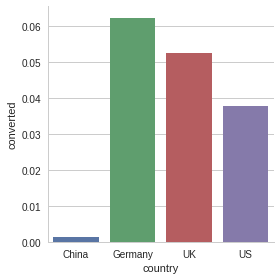

In [10]:
# plots
data_country = df[["country", "converted"]].groupby(["country"], as_index=False).mean()
data_country
sns.factorplot(x="country", y="converted", data=data_country, kind="bar")

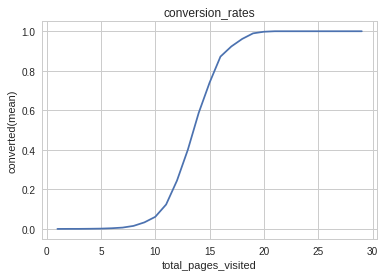

In [11]:
data_pages = df[["total_pages_visited", "converted"]].groupby("total_pages_visited", as_index=False).mean()
plt.plot(data_pages["total_pages_visited"], data_pages["converted"])
plt.xlabel("total_pages_visited")
plt.ylabel("converted(mean)")
plt.title("conversion_rates")

In [12]:
# Dummies for countries and source

# Dummies for countries
country_dummies = pd.get_dummies(df["country"])
df = pd.concat((df, country_dummies), axis=1)
df.drop(["country"], axis=1, inplace=True)

# Dummies for source
source_dummies = pd.get_dummies(df["source"])
df = pd.concat((df, source_dummies), axis =1)
df.drop(["source"], axis=1, inplace=True)

df.head()

,age,new_user,total_pages_visited,converted,China,Germany,UK,US,Ads,Direct,Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [13]:
# ML model

# Define the variables
X = df
y = X.pop("converted")

In [28]:
# Split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
y_train.mean(), y_test.mean()

(0.032461340936125217, 0.031826806969121962)

In [20]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, max_features=3)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.98860525272359945

In [21]:
model.score(X_test, y_test)

0.984436394303567

In [29]:
1 - y_test.mean()

0.96817319303087801

In [30]:
y_pred = model.predict(X_test)
print classification_report(y_true=y_test, y_pred=y_pred)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99    101025
          1       0.81      0.67      0.73      3321

avg / total       0.98      0.98      0.98    104346



In [22]:
model.feature_importances_

array([ 0.11693011,  0.03760963,  0.8024399 ,  0.0223936 ,  0.00288965,
        0.00439061,  0.00416846,  0.00284168,  0.00304207,  0.00329429])

/home/shreeranga/PP/Exp/venvs/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


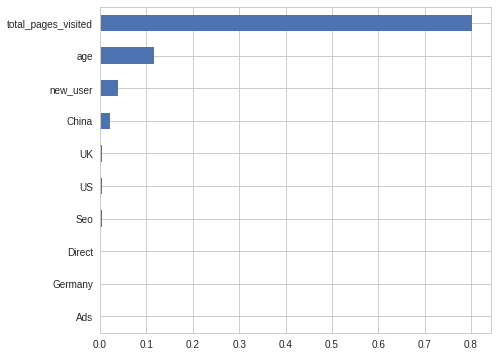

In [24]:
imp_features = pd.Series(model.feature_importances_, index = X.columns)
imp_features.sort()
imp_features.plot(kind="barh", figsize=(7,6))